# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [3]:
df_train = pd.read_csv("../files/data/TWIN/CORNER_CRACK_COUNTERSUNK_HOLE/TWIN_CORNER_CRACK_CS2_QUARTER_ELLIPSE_PART_4_TRAIN.csv")
df_train

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,2.0,4.6,0.1,0.1,0.1,0.2,2.0,0.5,0.057913,0.057913,0.833471,0.981817,0.756751,0.998991,0.245568,0.233410
1,2.0,4.6,0.1,0.1,0.1,0.2,2.0,0.5,0.069369,0.069369,0.848463,0.999350,0.769284,1.014410,0.250080,0.237639
2,2.0,4.6,0.1,0.1,0.1,0.2,2.0,0.5,0.080826,0.080826,0.866532,1.020318,0.784518,1.033782,0.255487,0.242807
3,2.0,4.6,0.1,0.1,0.1,0.2,2.0,0.5,0.092282,0.092282,0.886829,1.044018,0.801648,1.055294,0.261517,0.248604
4,2.0,4.6,0.1,0.1,0.1,0.2,2.0,0.5,0.103739,0.103739,0.908821,1.070128,0.820217,1.078411,0.268087,0.254834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20178811,10000.0,5.8,10.0,0.5,10.0,0.5,3.0,0.5,1.467061,1.467061,1.275520,1.275520,0.013702,0.013702,0.441258,0.441258
20178812,10000.0,5.8,10.0,0.5,10.0,0.5,3.0,0.5,1.478518,1.478518,1.255468,1.255468,0.012713,0.012713,0.434244,0.434244
20178813,10000.0,5.8,10.0,0.5,10.0,0.5,3.0,0.5,1.489974,1.489974,1.238826,1.238826,0.011865,0.011865,0.428350,0.428350
20178814,10000.0,5.8,10.0,0.5,10.0,0.5,3.0,0.5,1.501431,1.501431,1.225038,1.225038,0.011146,0.011146,0.423640,0.423640


In [4]:
# Get unique combinations of the first four columns
CC_combinations = df_train.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

157647


In [5]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [ 2.4  2.6  2.8  3.2  3.6  4.6  5.2  5.8  6.4  8.   9.  10.  12.  16.
 20.  30. ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a1/t values:  [0.1 0.2 0.3 0.4 0.5]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a2/t values:  [0.1 0.2 0.3 0.4 0.5]
Different r/t values:  [0.5 1.  1.5 2.  3.  5. ]
Different b/t values:  [0.5]


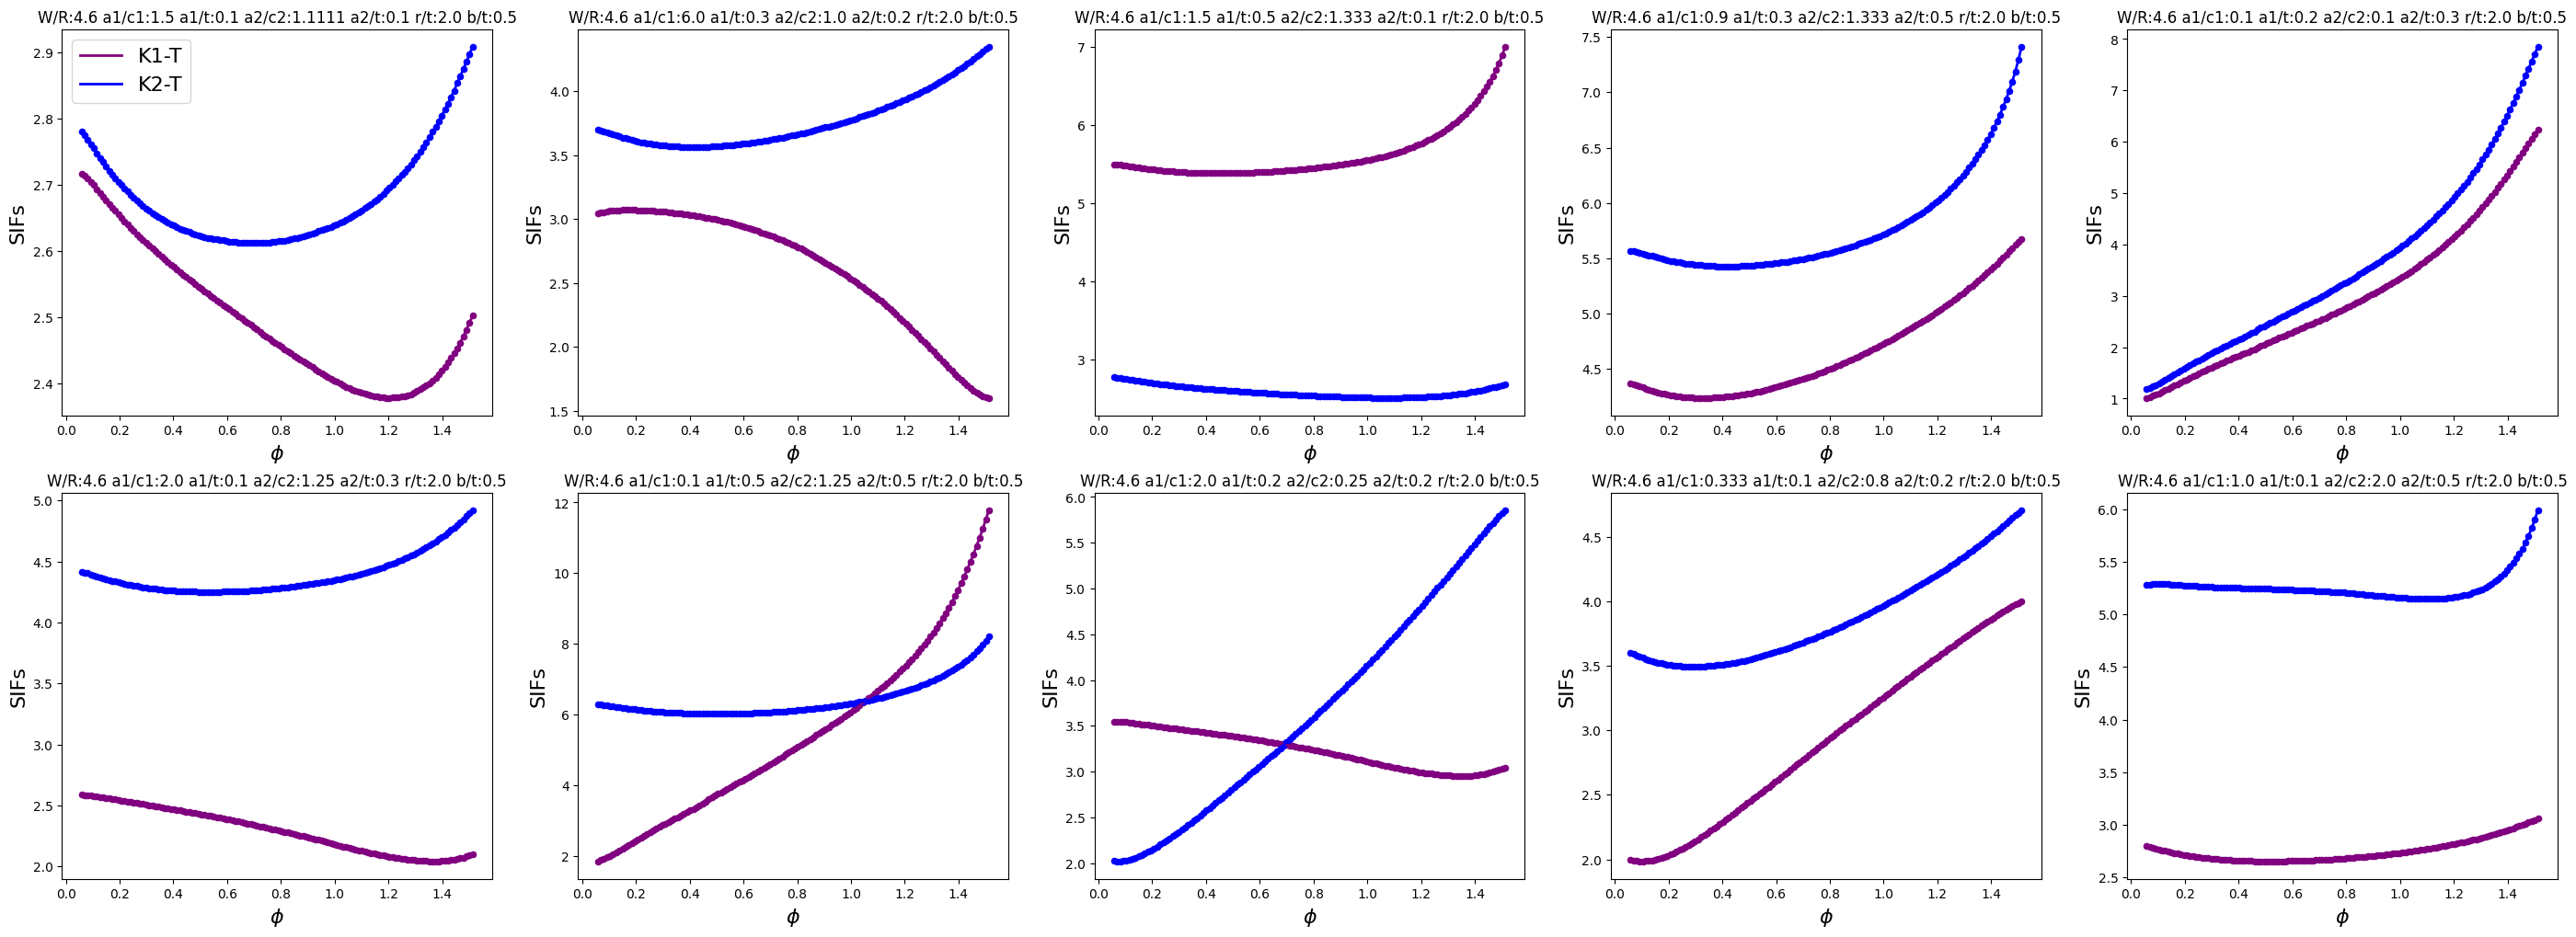

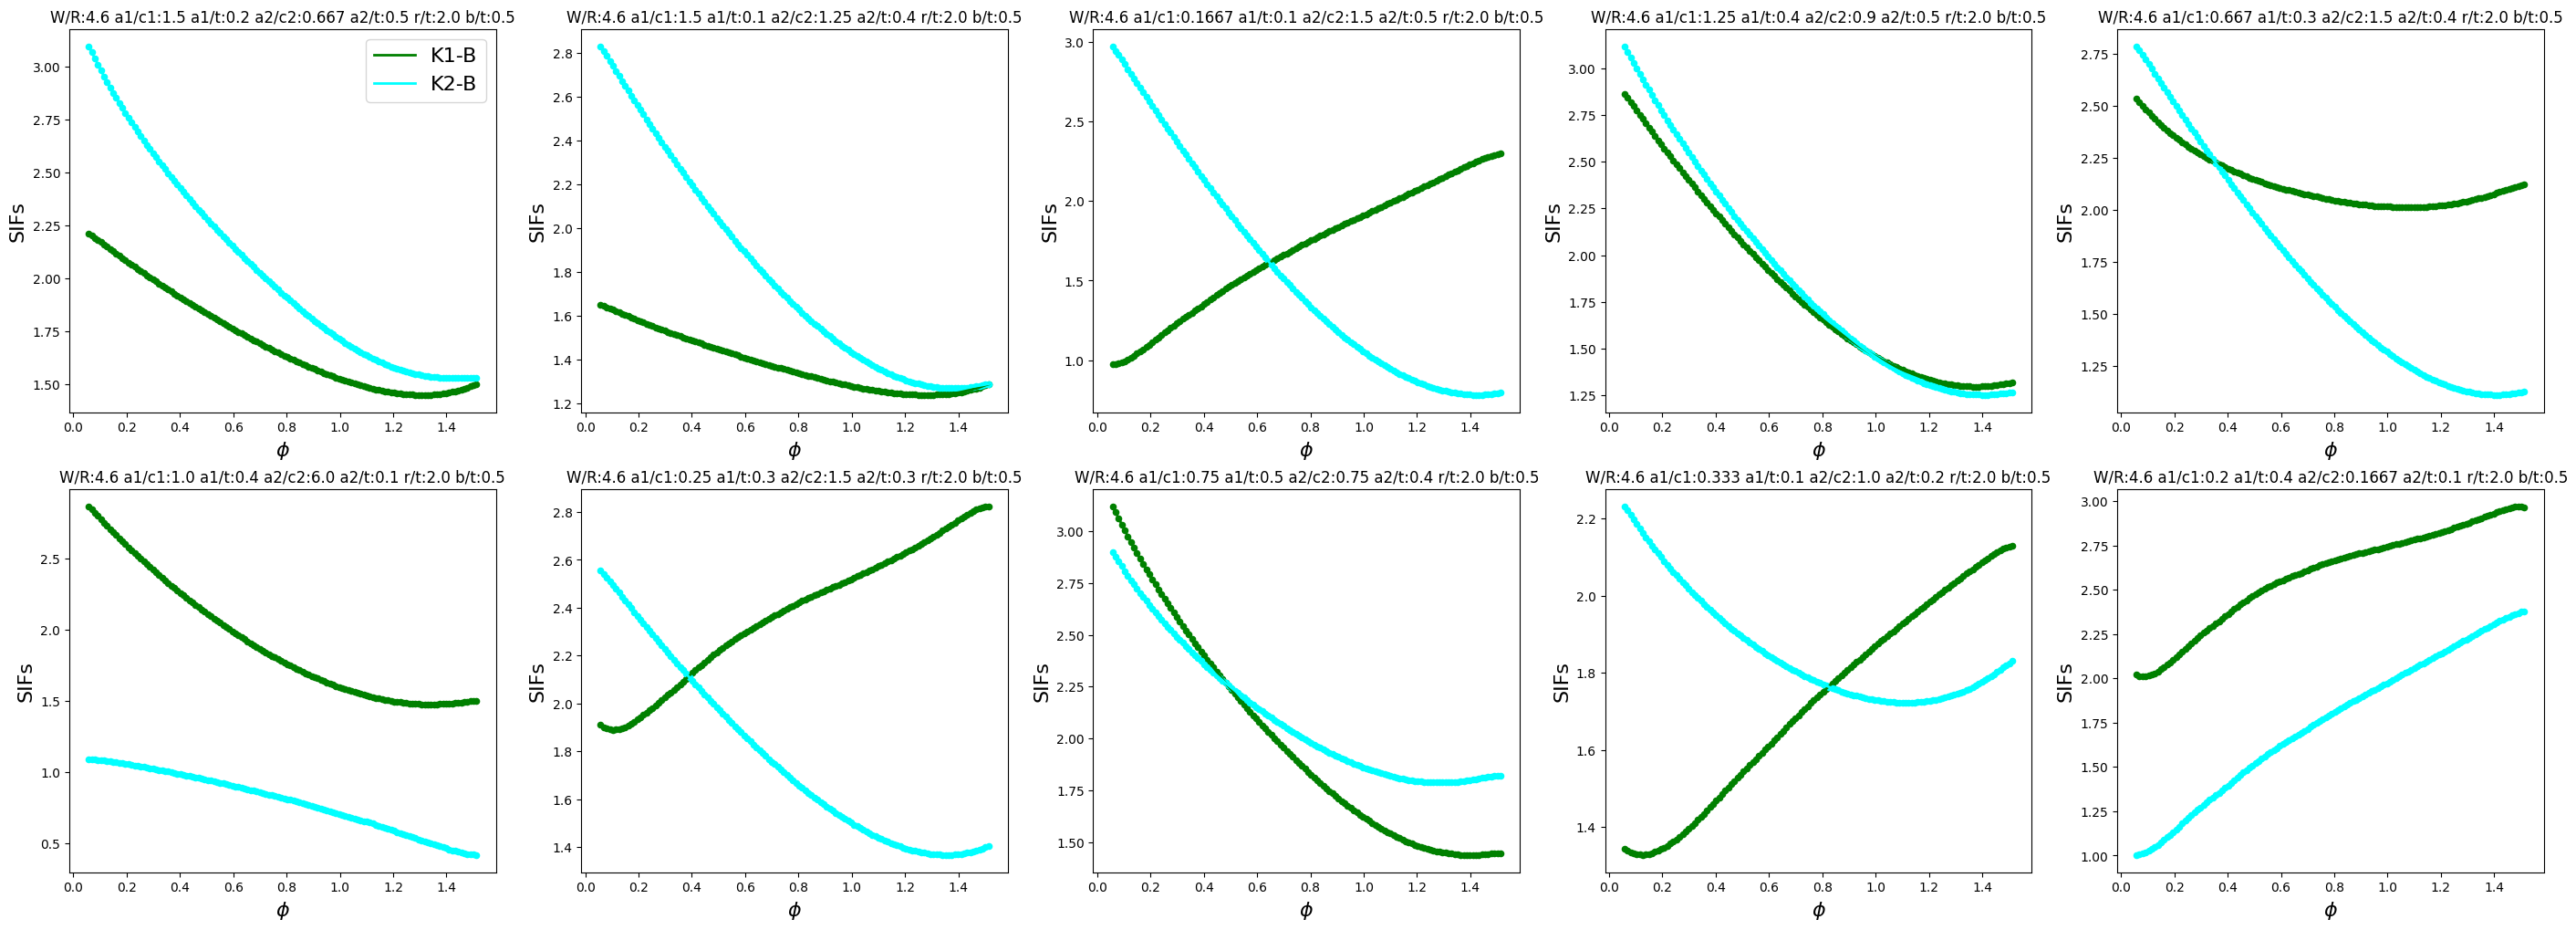

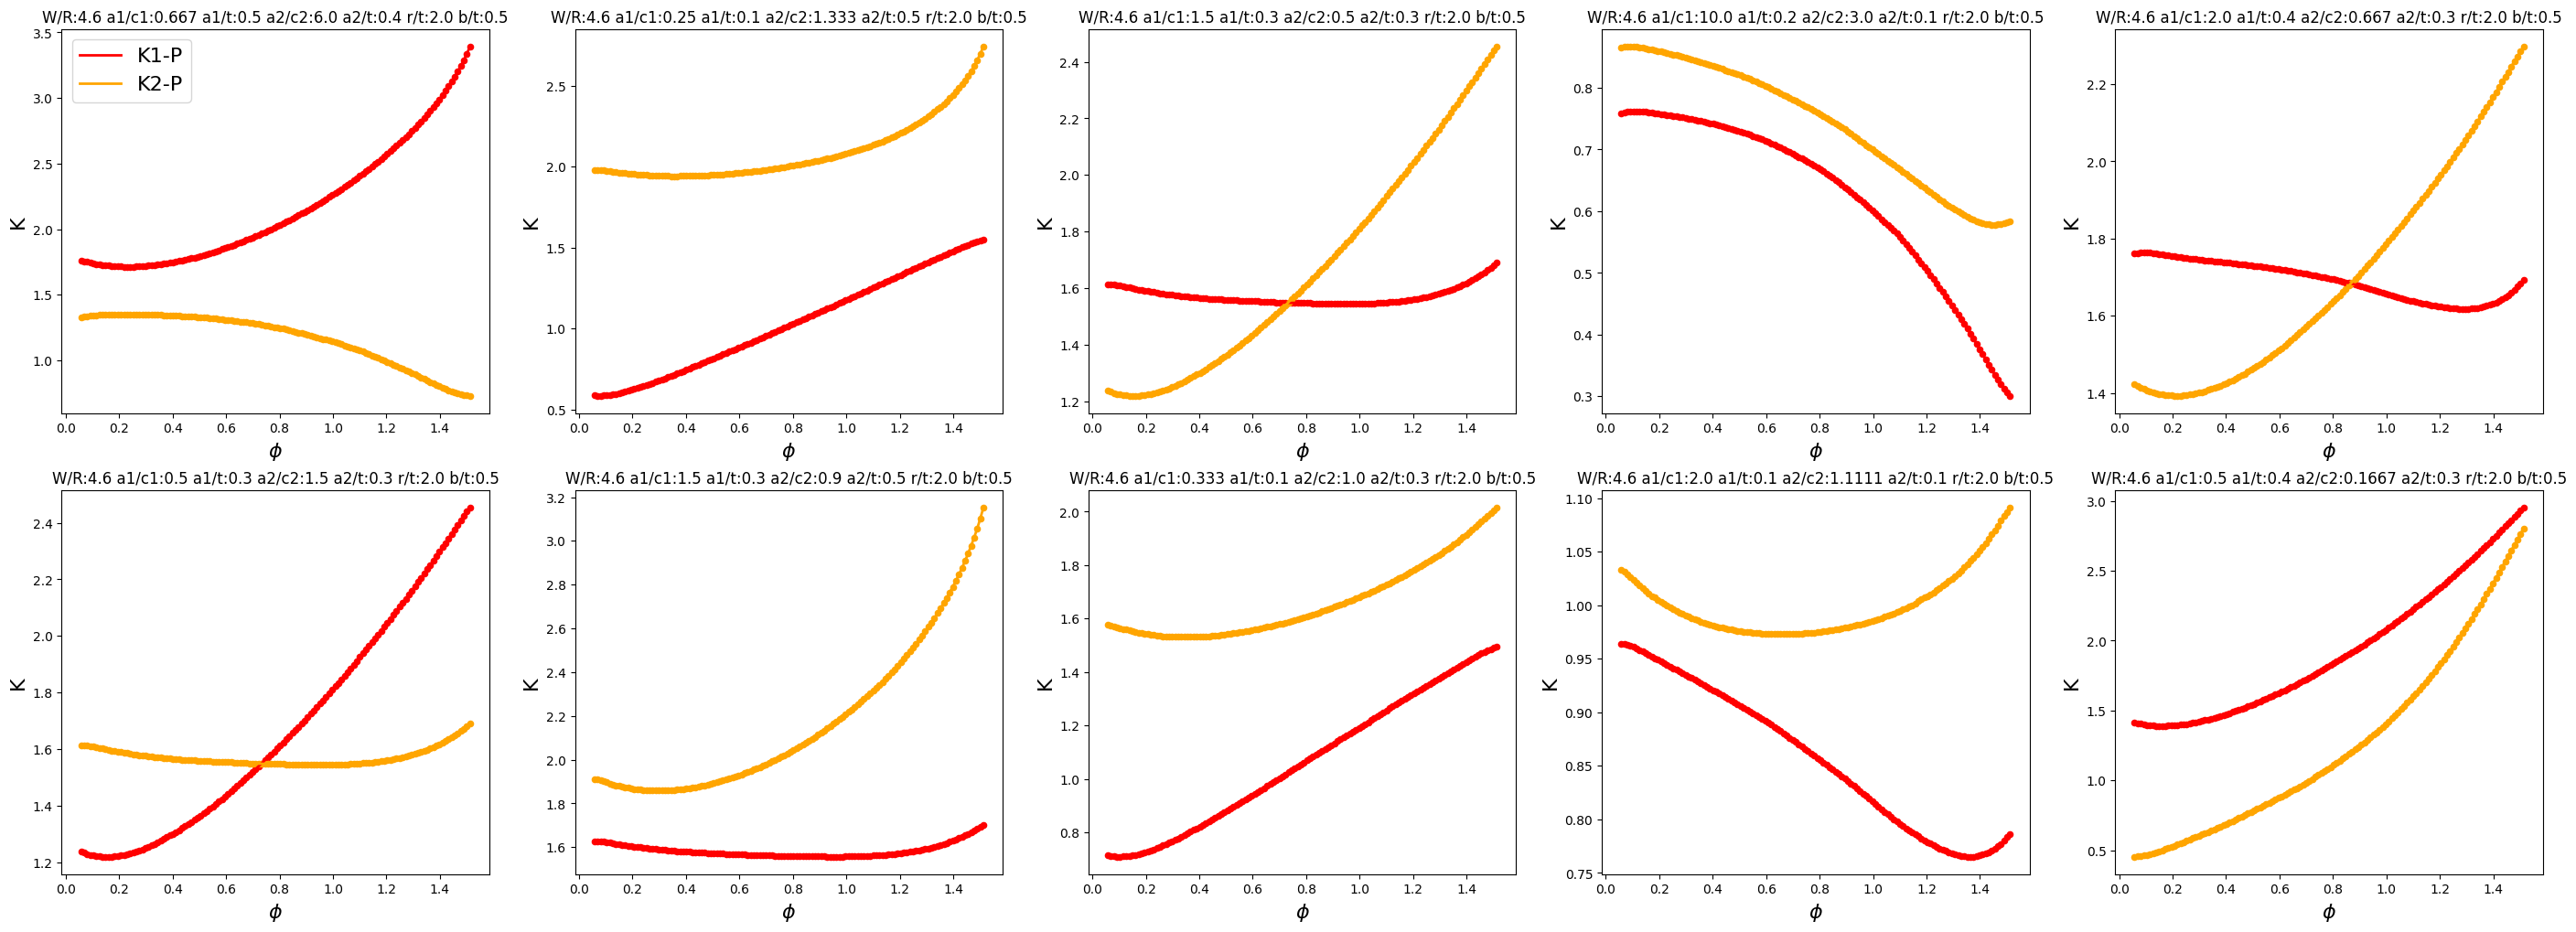

In [6]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [7]:
df_test = pd.read_csv("../files/data/TWIN/CORNER_CRACK_COUNTERSUNK_HOLE/TWIN_CORNER_CRACK_CS2_QUARTER_ELLIPSE_PART_4_TEST.csv")
df_test

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,1.0,4.6,0.1,0.1,0.1,0.1,2.0,0.5,0.057913,0.057913,0.825170,0.825170,0.751263,0.751263,0.242868,0.242868
1,1.0,4.6,0.1,0.1,0.1,0.1,2.0,0.5,0.069369,0.069369,0.839977,0.839977,0.763785,0.763785,0.247288,0.247288
2,1.0,4.6,0.1,0.1,0.1,0.1,2.0,0.5,0.080826,0.080826,0.857955,0.857955,0.778942,0.778942,0.252599,0.252599
3,1.0,4.6,0.1,0.1,0.1,0.1,2.0,0.5,0.092282,0.092282,0.878057,0.878057,0.796001,0.796001,0.258618,0.258618
4,1.0,4.6,0.1,0.1,0.1,0.1,2.0,0.5,0.103739,0.103739,0.899787,0.899787,0.814393,0.814393,0.265152,0.265152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6720379,9994.0,5.8,10.0,0.5,6.0,0.4,3.0,0.5,1.467061,1.467061,1.275520,1.477938,0.013714,0.208148,0.441258,0.512123
6720380,9994.0,5.8,10.0,0.5,6.0,0.4,3.0,0.5,1.478518,1.478518,1.255468,1.464752,0.012729,0.205644,0.434244,0.507577
6720381,9994.0,5.8,10.0,0.5,6.0,0.4,3.0,0.5,1.489974,1.489974,1.238826,1.454899,0.011881,0.203577,0.428350,0.503927
6720382,9994.0,5.8,10.0,0.5,6.0,0.4,3.0,0.5,1.501431,1.501431,1.225038,1.446747,0.011159,0.201947,0.423640,0.501319


In [8]:
# Get unique combinations of the first four columns
CC_combinations = df_test.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

52503


In [9]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [ 2.4  2.6  2.8  3.2  3.6  4.6  5.2  5.8  6.4  8.   9.  10.  12.  16.
 20.  30. ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a1/t values:  [0.1 0.2 0.3 0.4 0.5]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a2/t values:  [0.1 0.2 0.3 0.4 0.5]
Different r/t values:  [0.5 1.  1.5 2.  3.  5. ]
Different b/t values:  [0.5]


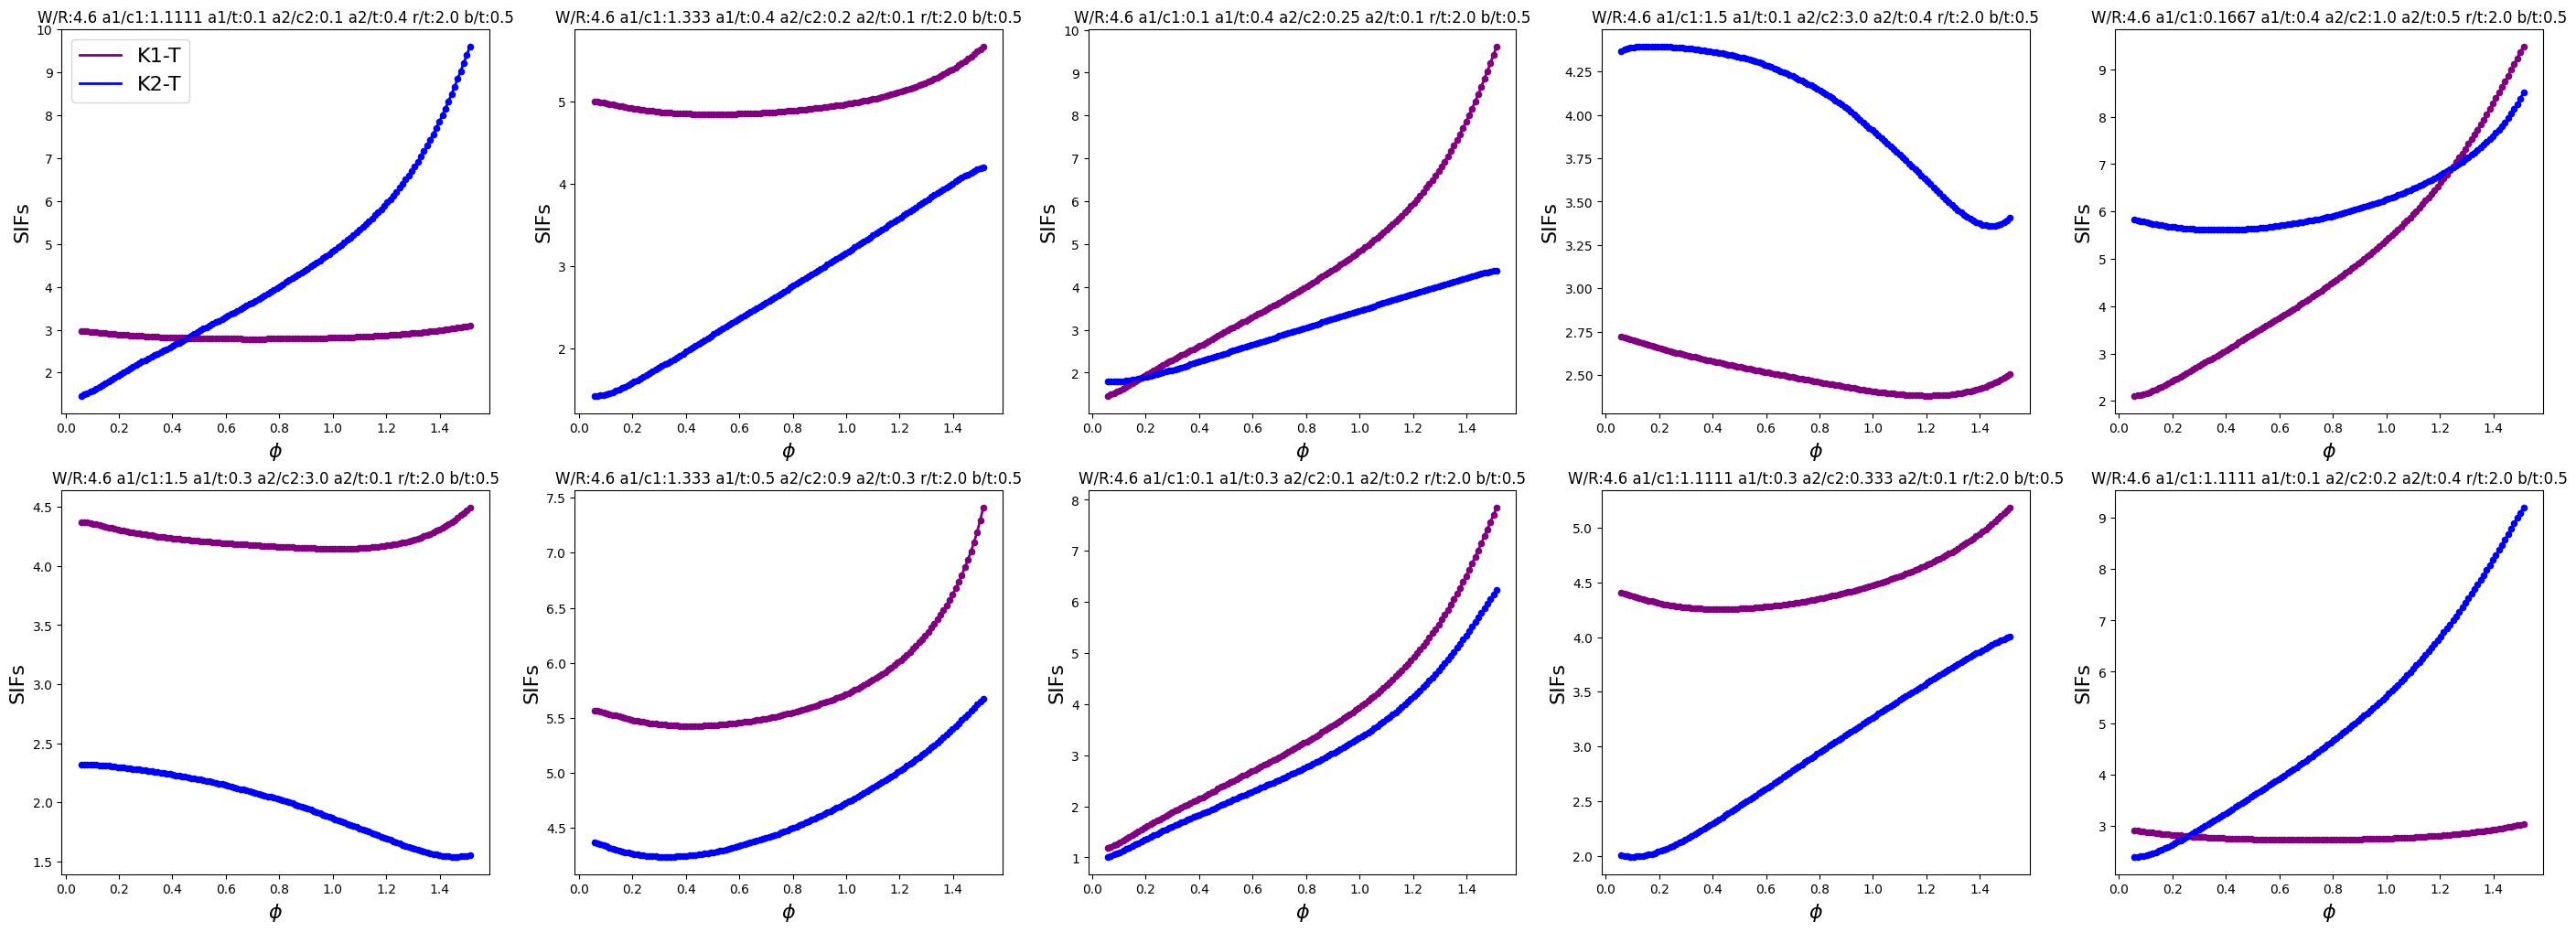

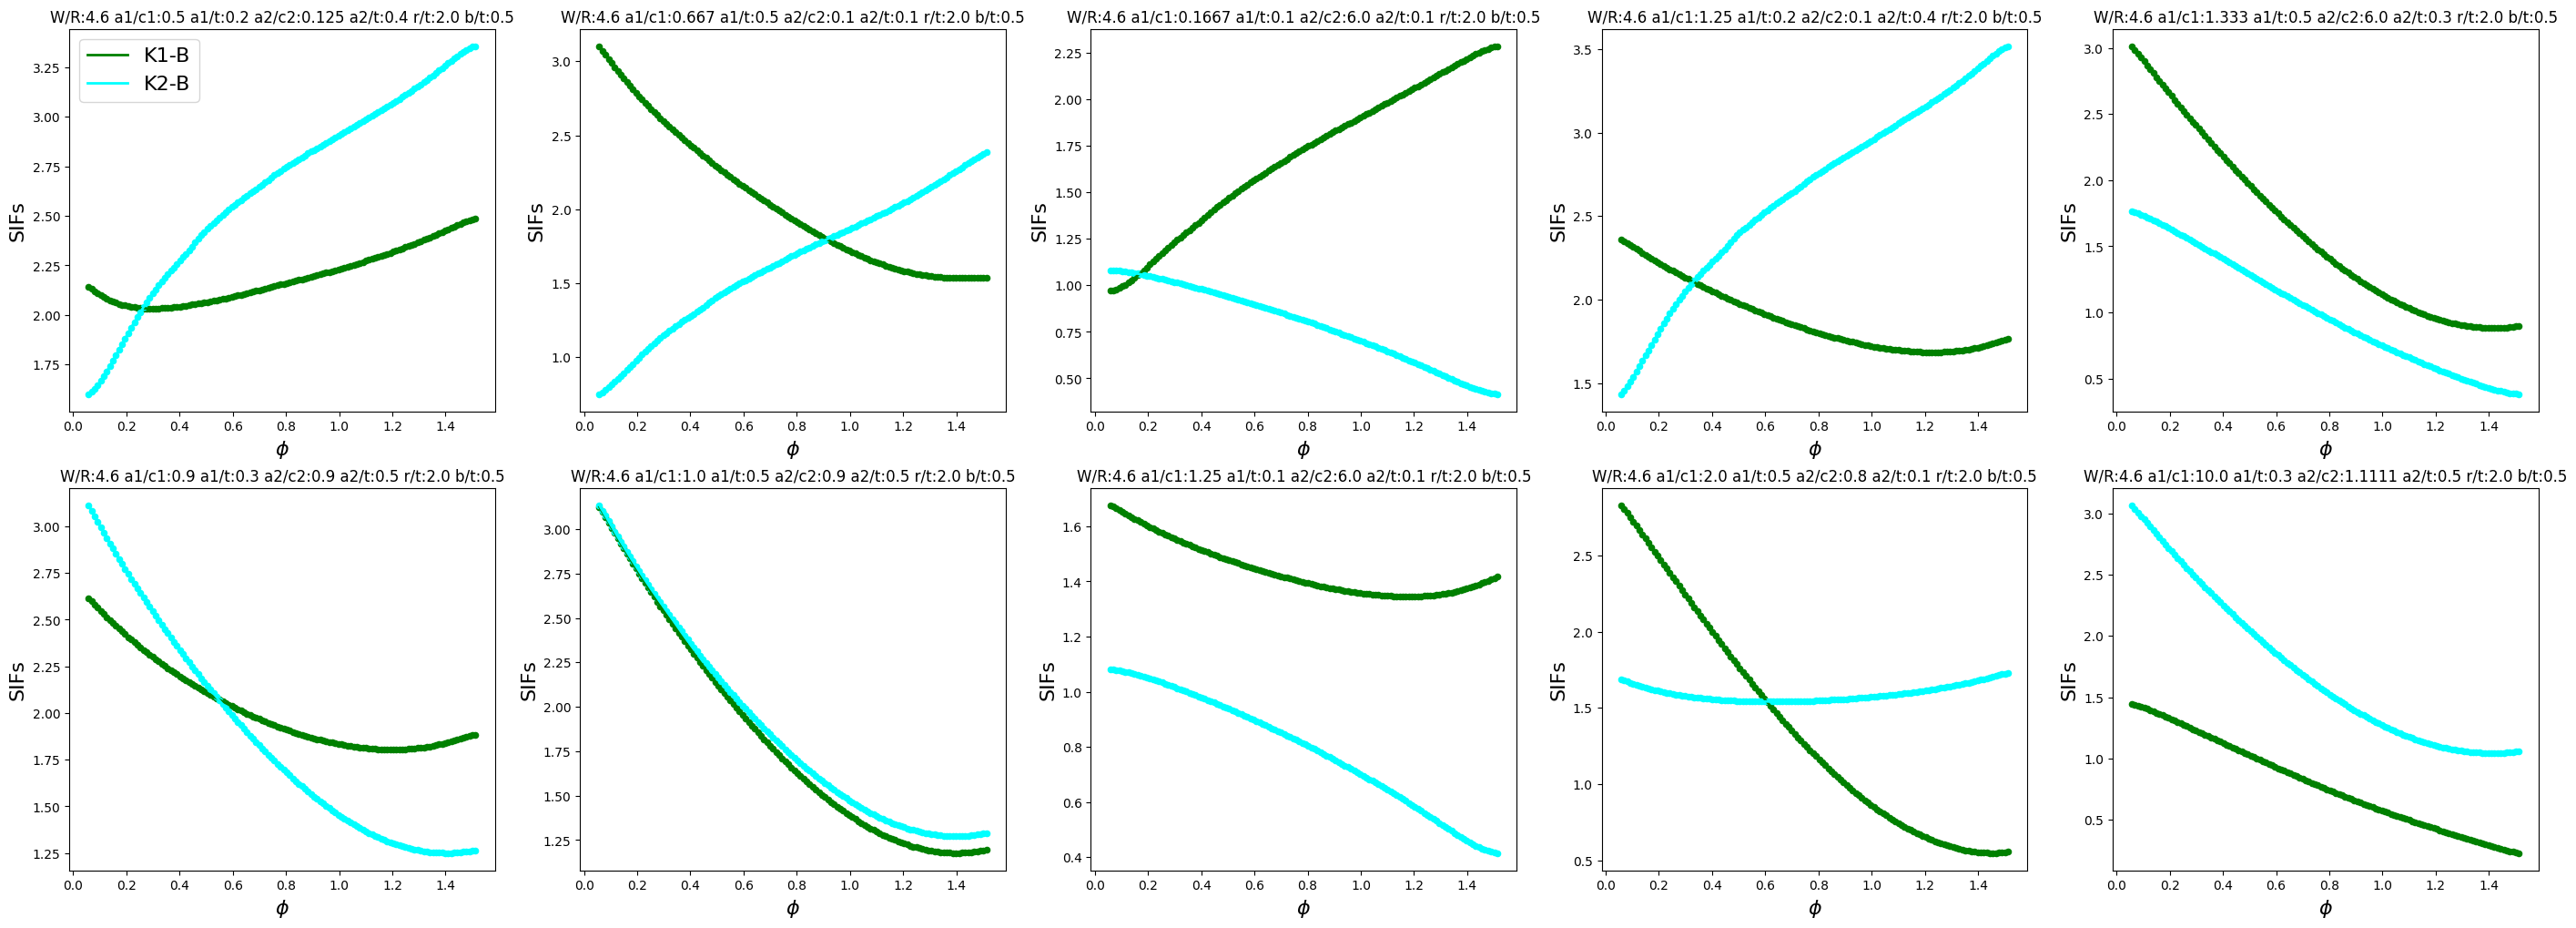

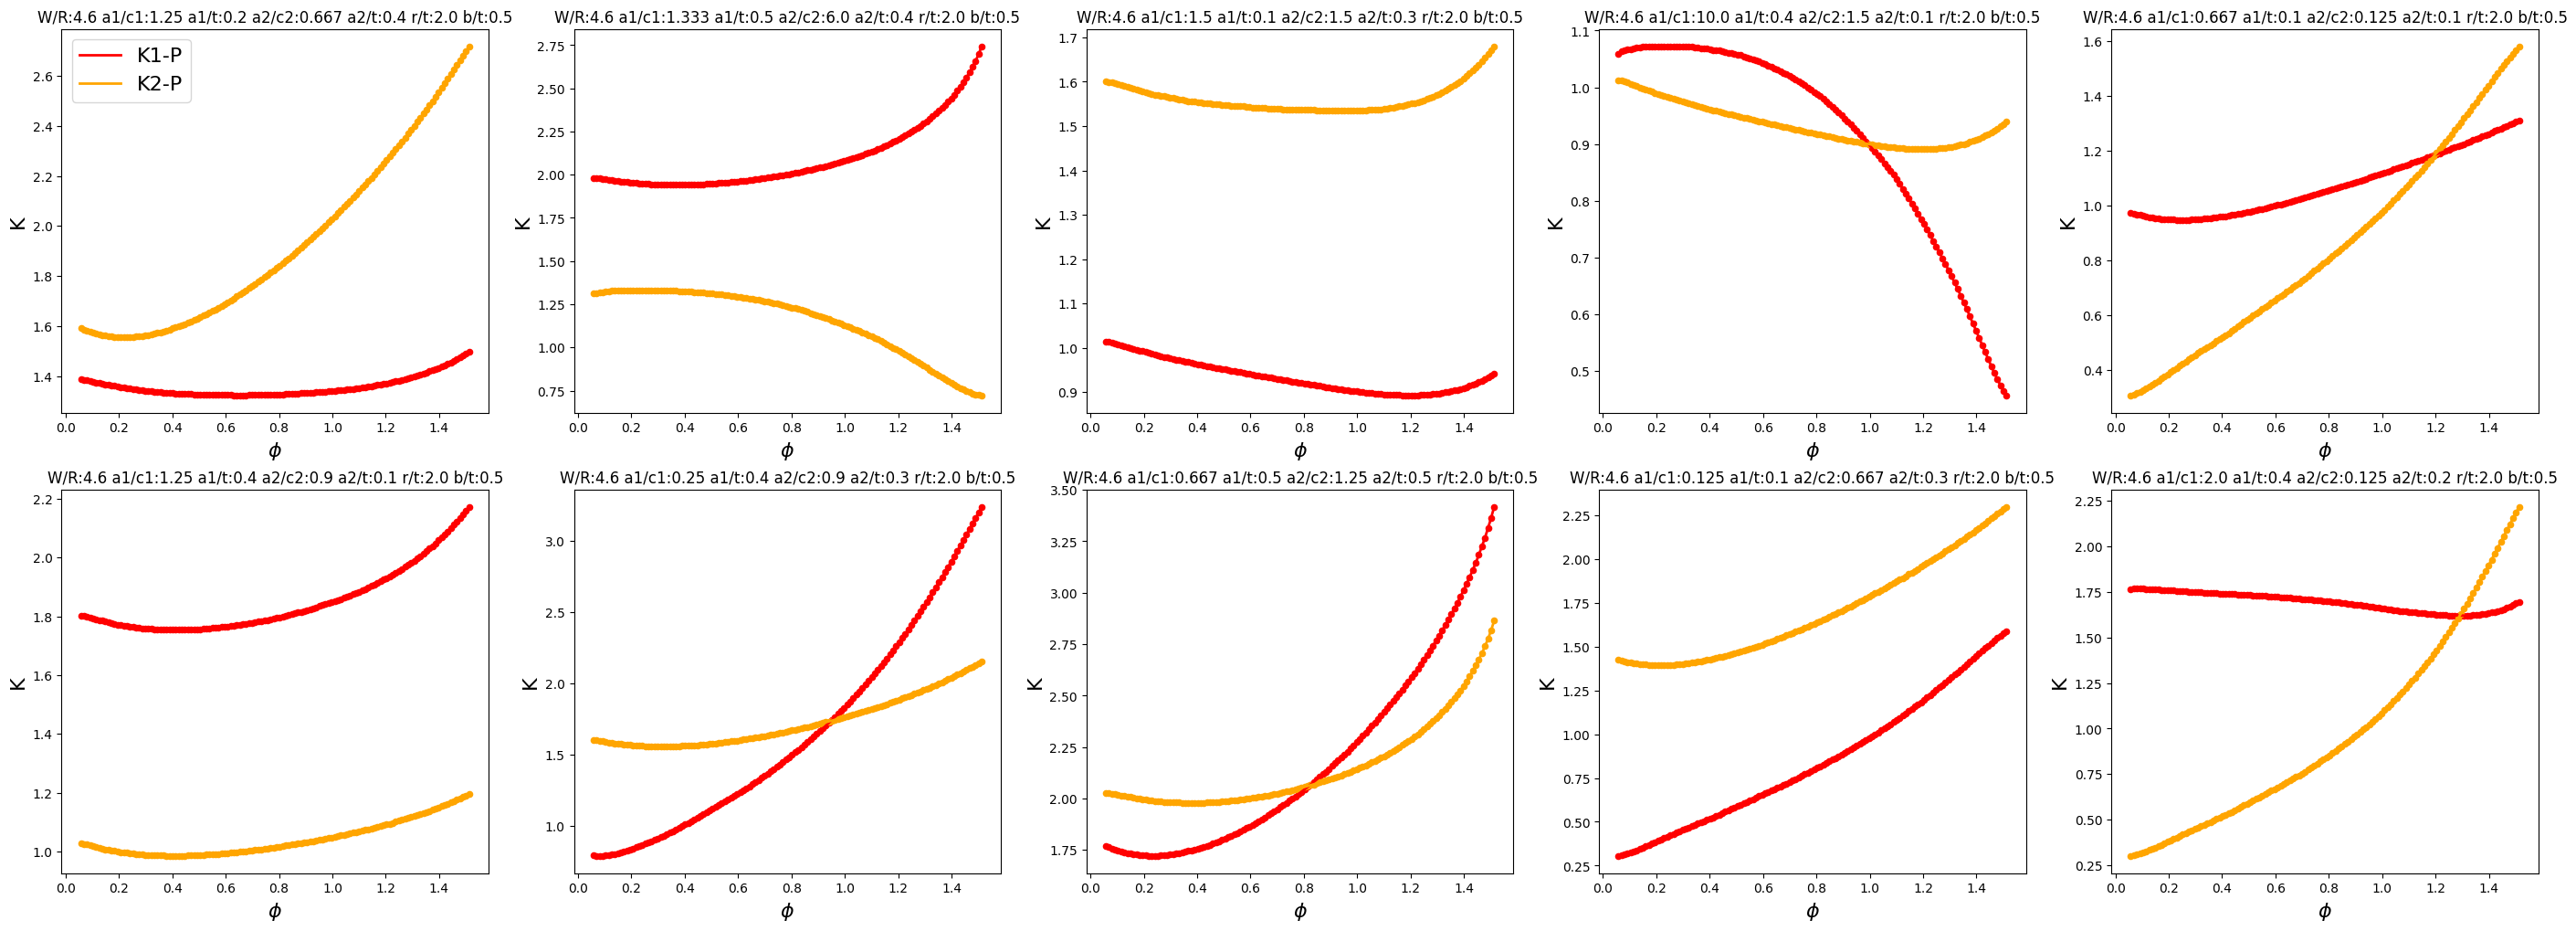

In [10]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()